#Practica 1: Regresión Lineal

## Alumno: Cano Portugal Israel Daniel Arturo
## Profesor: Jiménez Alcantar Daniel
## Grupo: 5AV1
## Materia: Aprendizaje a Maquina e Inteligencia Artificial



## Introduccion
La regresión lineal es un método estadístico y de machine learning utilizado para modelar la relación entre una variable dependiente (también llamada variable de respuesta o target) y una o más variables independientes (predictores o features). El objetivo principal es predecir valores continuos de la variable dependiente basados en los predictores, asumiendo que existe una relación lineal entre ellos.

Fórmula Básica: En su forma simple (regresión lineal univariada), se representa como:
$$y = \beta_0 + \beta_1 x + \epsilon$$
Donde:

* $ y $: Variable dependiente (lo que queremos predecir).
* $ x $: Variable independiente.
* $ \beta_0 $: Intersección (bias).
* $ \beta_1 $: Pendiente (coeficiente que indica la fuerza y dirección de la relación).
* $ \epsilon $: Término de error (residuos aleatorios).



En la regresión lineal múltiple, se extiende a múltiples variables independientes:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon$$
Este modelo se entrena minimizando el error cuadrático medio (MSE) mediante técnicas como el método de los mínimos cuadrados ordinarios (OLS) o gradiente descendente. Es ampliamente usado en escenarios como predicción de precios, estimación de ventas o análisis de tendencias.

Ventajas: Simple de implementar, interpretable y eficiente computacionalmente.

Limitaciones: Asume linealidad, independencia de errores y homocedasticidad (varianza constante de errores). No maneja bien datos no lineales o outliers sin preprocesamiento.
Aplicaciones Reales: En finanzas (predicción de precios de acciones), marketing (estimación de ROI) o salud (predicción de peso basado en altura y edad).


## Problematica
Se debe automatizar y recoletar un dataset a partir de los tickets de ventas de productos, asegurándose de que los datos estén correctamente preprocesados y estructurados para poder integrarlos en un modelo de aprendizaje automático de regresión lineal.

## Metodologia

Para esta práctica, se adopta una metodología de ciencia de datos basada en el marco CRISP-DM (Cross-Industry Standard Process for Data Mining). CRISP-DM proporciona un proceso iterativo y estructurado, dividido en seis fases principales: Comprensión del Negocio, Comprensión de los Datos, Preparación de los Datos, Modelado, Evaluación y Despliegue. Esta metodología se adapta específicamente a la práctica, enfocándose en las fases relevantes para la extracción de datos no estructurados (PDFs) y su preparación para modelado predictivo. El proceso es iterativo, permitiendo retroalimentación entre fases para refinar resultados.

Se utilizan herramientas de programación en Python para garantizar reproducibilidad, eficiencia y escalabilidad. A continuación, se detalla cada fase adaptada al contexto de la práctica.

### **1. Comprensión del Negocio (Business Understanding)**

El desafío de esta práctica se centra en la transformación de datos no estructurados, provenientes de tickets de venta en formato PDF, en información valiosa para la toma de decisiones empresariales. La meta es predecir variables continuas, como el valor total de una venta, basándose en atributos extraídos de estos tickets. Para ello, se empleará la regresión lineal como una herramienta de Machine Learning que permita modelar y comprender las relaciones entre las variables.

**Problema del Negocio:**
La empresa necesita automatizar el análisis de sus ventas. Los datos están dispersos en tickets de venta en formato PDF, lo que impide un análisis ágil y la identificación de patrones clave. Esto obstaculiza la capacidad de la empresa para pronosticar ingresos, optimizar precios y entender el impacto de los diferentes factores de venta.

**Objetivos:**
* **Crear un Dataset Estructurado:** Generar un dataset limpio y unificado a partir de los tickets en PDF, asegurando que los datos estén listos para el análisis y el modelado predictivo.
* **Construir un Modelo Predictivo:** Desarrollar un modelo de regresión lineal capaz de predecir con precisión el total de la venta de un ticket basándose en la cantidad y el tipo de productos, así como el método de pago.
* **Identificar Factores Clave de Ingresos:** Analizar los coeficientes del modelo para identificar qué variables (por ejemplo, tipos de productos, descuentos, etc.) tienen el mayor impacto en el total de la venta.

**Criterios de Éxito:**
* **Calidad del Dataset:** El dataset final debe tener menos del 5% de valores faltantes y una estructura que facilite la ingesta en un modelo de Machine Learning.
* **Rendimiento del Modelo:** El modelo de regresión lineal debe alcanzar un $R^2$ ajustado superior a 0.85 en el conjunto de datos de prueba, con un Error Absoluto Medio (MAE) que demuestre que el modelo tiene la capacidad de hacer predicciones precisas.
* **Interpretación:** Los coeficientes del modelo deben ser interpretables y proporcionar información clara sobre las relaciones entre los predictores y la variable objetivo, permitiendo una fácil comunicación de los hallazgos a las partes interesadas del negocio.

### **2. Comprensión de los Datos (Data Understanding)**

El objetivo de esta fase es examinar y comprender los datos brutos extraídos de los tickets en PDF para identificar su estructura, calidad y posibles limitaciones antes de la preparación y el modelado.

**Inspección de Tickets:** Los 5 tickets muestran una estructura consistente:

In [37]:
# Importar bibliotecas necesarias
import os
import random
import pdfplumber
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Configurar la ruta de los PDFs
path = "C:/Users/Administrator/Documents/tarea/ESCOM/5S/ML/TicketsPDF/"

# Obtener lista de archivos PDF en la carpeta
pdf_files = [f for f in os.listdir(path) if f.endswith('.pdf')]

# Seleccionar 5 PDFs aleatorios
random.seed(42)  # Para reproducibilidad
selected_pdfs = random.sample(pdf_files, min(5, len(pdf_files)))  # Asegura no exceder el número de archivos

# Función para extraer y mostrar texto de un PDF
def visualizar_pdf(file_path):
    print(f"\n=== Contenido del PDF: {os.path.basename(file_path)} ===")
    try:
        with pdfplumber.open(file_path) as pdf:
            for i, page in enumerate(pdf.pages):
                print(f"\nPágina {i+1}:")
                # Extraer texto crudo
                text = page.extract_text()
                if text:
                    print(text)
                else:
                    print("No se encontró texto en esta página. ¿Es un PDF escaneado?")
                # Extraer tablas si existen
                tables = page.extract_tables()
                if tables:
                    print("\nTablas encontradas en la página:")
                    for j, table in enumerate(tables):
                        # Convertir tabla a DataFrame para mejor visualización
                        df_table = pd.DataFrame(table)
                        print(f"\nTabla {j+1}:")
                        print(df_table)
    except Exception as e:
        print(f"Error al procesar {file_path}: {e}")

# Visualizar los 5 PDFs seleccionados
for pdf_file in selected_pdfs:
    full_path = os.path.join(path, pdf_file)
    visualizar_pdf(full_path)


=== Contenido del PDF: Ticket_NXDFIZ.pdf ===

Página 1:
TICKET DE COMPRA
Ticket #NXDFIZ
Fecha: 23/07/2025
Lugar de pago: Tienda Walmart
Método de pago: Tarjeta
Subtotal: $4625.08
Descuento: $0.00
IVA (16%): $740.01
Total: $5355.52
Cant Producto Precio Total
3 Pollo 1kg $121.09 $363.28
1 Huevos 12pz $76.89 $76.89
2 Pollo 1kg $117.17 $234.35
3 Detergente 2kg $86.42 $259.26
2 Arroz 1kg $41.63 $83.26
3 Huevos 12pz $76.30 $228.89
2 Pollo 1kg $119.69 $239.39
3 Leche 1L $25.47 $76.40
1 Microondas $1943.38 $1943.38
3 Pan Baguette $28.79 $86.37
8 Pollo 1kg $124.66 $997.29
1 Refresco 2L $36.32 $36.32

=== Contenido del PDF: Ticket_3L9QAN.pdf ===

Página 1:
TICKET DE COMPRA
Ticket #3L9QAN
Fecha: 29/08/2025
Lugar de pago: Tienda Walmart
Método de pago: Tarjeta
Subtotal: $6439.07
Descuento: $321.95
IVA (16%): $978.74
Total: $7142.93
Cant Producto Precio Total
1 Leche 1L $26.20 $26.20
3 Refresco 2L $36.58 $109.73
2 Licuadora $783.81 $1567.63
3 Pollo 1kg $117.91 $353.72
3 Detergente 2kg $89.35 $268.

Los 5 tickets aleatorios que se visualizan revelan una estructura consistente:

**Metadatos del Ticket:** Cada ticket contiene un encabezado con información clave:

* Ticket # (un identificador único).
* Fecha (en formato dd/mm/yyyy).
* Lugar de pago y Método de pago.
* Un resumen financiero con Subtotal, Descuento, IVA y Total.
* Tabla de Ítems: Un cuerpo con una tabla de ítems que detalla cada producto vendido, incluyendo las columnas Cant, Producto, Precio (unitario) y Total (por ítem).

In [5]:
# Lista para almacenar datos y errores
datos = []
errores = []

# Regex mejorado
regex_patterns = {
    'ticket_id': r'Ticket #(\w+)',
    'fecha': r'Fecha:\s*(\d{2}/\d{2}/\d{4})',
    'subtotal': r'Subtotal:\s*\$([\d\.]+)',
    'descuento': r'Descuento:\s*\$([\d\.]+)',
    'iva': r'IVA\s*\(16%\):\s*\$([\d\.]+)',
    'total': r'Total:\s*\$([\d\.]+)',
    'metodo_pago': r'Método de pago:\s*(\w+)',
    'items': r'^(\d+)\s+([^\d\n][^\$]*?)\s+\$(\d+\.\d{2})\s+\$(\d+\.\d{2})$'
}

# Procesar cada PDF
for pdf_file in pdf_files:
    full_path = os.path.join(path, pdf_file)
    try:
        with pdfplumber.open(full_path) as pdf:
            if not pdf.pages:
                errores.append(f"{pdf_file}: PDF vacío")
                continue
            page = pdf.pages[0]
            text = page.extract_text()
            if not text:
                errores.append(f"{pdf_file}: No se pudo extraer texto")
                continue

            # Extraer metadatos
            ticket_id = re.search(regex_patterns['ticket_id'], text)
            ticket_id = ticket_id.group(1) if ticket_id else 'Unknown'

            fecha = re.search(regex_patterns['fecha'], text)
            fecha = fecha.group(1) if fecha else '01/01/2000'

            subtotal = re.search(regex_patterns['subtotal'], text)
            subtotal = float(subtotal.group(1)) if subtotal else 0.0

            descuento = re.search(regex_patterns['descuento'], text)
            descuento = float(descuento.group(1)) if descuento else 0.0

            iva = re.search(regex_patterns['iva'], text)
            iva = float(iva.group(1)) if iva else 0.0

            total = re.search(regex_patterns['total'], text)
            total = float(total.group(1)) if total else 0.0

            metodo_pago = re.search(regex_patterns['metodo_pago'], text)
            metodo_pago = metodo_pago.group(1) if metodo_pago else 'Unknown'

            # Extraer ítems (línea por línea para evitar cabecera)
            lines = text.split('\n')
            for line in lines:
                match = re.match(regex_patterns['items'], line, re.MULTILINE)
                if match:
                    cantidad, producto, precio, total_item = match.groups()
                    # Limpiar producto
                    match_prod = re.match(r'(\d+)\s+(.+)', producto)
                    if match_prod:
                        cantidad = int(match_prod.group(1))  # Usar número inicial como cantidad
                        producto_limpio = match_prod.group(2).strip()
                    else:
                        cantidad = int(cantidad)
                        producto_limpio = producto.strip()

                    # Normalizar producto
                    producto_limpio = re.sub(r'\s+', ' ', producto_limpio)  # Normalizar espacios
                    producto_limpio = producto_limpio.replace('  ', ' ').strip()

                    # Validar cantidad
                    if cantidad <= 0 or cantidad > 50:
                        errores.append(f"{pdf_file}: Cantidad anómala {cantidad} para '{producto_limpio}'")
                        continue

                    # Validar Total_Ítem
                    precio_float = float(precio)
                    total_item_float = float(total_item)
                    if abs(total_item_float - cantidad * precio_float) > 0.01:
                        errores.append(f"{pdf_file}: Discrepancia en Total_Ítem para '{producto_limpio}'")

                    datos.append({
                        'Ticket': ticket_id,
                        'Fecha': fecha,
                        'Producto': producto_limpio,
                        'Cantidad': cantidad,
                        'Precio': precio_float,
                        'Total_Ítem': total_item_float,
                        'Subtotal': subtotal,
                        'Descuento': descuento,
                        'IVA': iva,
                        'Total': total,
                        'Método_Pago': metodo_pago
                    })

    except Exception as e:
        errores.append(f"{pdf_file}: {str(e)}")

# Crear DataFrame
df = pd.DataFrame(datos)

In [6]:
# Crear DataFrame
df = pd.DataFrame(datos)

# Convertir tipos
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Cantidad'] = df['Cantidad'].astype(int)
df['Precio'] = df['Precio'].astype(float)
df['Total_Ítem'] = df['Total_Ítem'].astype(float)
df['Subtotal'] = df['Subtotal'].astype(float)
df['Descuento'] = df['Descuento'].astype(float)
df['IVA'] = df['IVA'].astype(float)
df['Total'] = df['Total'].astype(float)

# Guardar dataset
df.to_csv('tickets_dataset.csv', index=False)
print("Primeras filas del DataFrame:")
display(df.head())
print(f"\nTotal de filas: {len(df)}")

Primeras filas del DataFrame:


,Ticket,Fecha,Producto,Cantidad,Precio,Total_Ítem,Subtotal,Descuento,IVA,Total,Método_Pago
0,00B8DM,2025-07-31,Pan Baguette,3,31.20,93.59,4814.12,0.0,770.26,5650.43,Transferencia
1,00B8DM,2025-07-31,Pollo 1kg,1,123.24,123.24,4814.12,0.0,770.26,5650.43,Transferencia
2,00B8DM,2025-07-31,Sartén antiadherente,1,352.00,352.00,4814.12,0.0,770.26,5650.43,Transferencia
3,00B8DM,2025-07-31,Huevos 12pz,8,79.19,633.48,4814.12,0.0,770.26,5650.43,Transferencia
4,00B8DM,2025-07-31,Detergente 2kg,1,88.05,88.05,4814.12,0.0,770.26,5650.43,Transferencia



Total de filas: 11339


**Análisis de Calidad y Estructura del Dataset:**
A partir de la extracción y el procesamiento de los 1000 tickets, se generó un dataset que contiene un total de 11,339 filas. La inspección del DataFrame inicial muestra que la extracción fue exitosa y los datos se han organizado en un formato tabular.

**Variables y Tipos de Datos:** Se identificaron 11 columnas, y los tipos de datos se han convertido de manera apropiada (por ejemplo, Fecha a tipo datetime, y las variables numéricas a tipo float64 o int64).

**Valores Faltantes:** Afortunadamente, no se encontraron valores nulos en el dataset (Non-Null Count: 11339 en todas las columnas), ya que el proceso de extracción manejó estas situaciones imputando valores como 0.0 para descuentos.

**Análisis de la Columna Producto:** Al examinar los valores únicos, se encontraron un total de 12 productos únicos, lo que indica una buena homogeneidad en los datos.

**Desafíos Identificados:**
Aunque el dataset está limpio de valores nulos, el siguiente paso será abordar las inconsistencias de redondeo detectadas en la fase de extracción y preparar las variables para el modelado.

### **3. Preparación de los Datos (Data Preparation)**

**Limpieza de Datos**
**Manejo de Valores Faltantes:** El proceso de extracción y el análisis inicial mostraron que no había valores nulos, ya que los campos de Descuento se imputaron con 0.0 si no estaban presentes en el ticket.

In [7]:
# Calidad del dataset y estructura de datos
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Ticket       11339 non-null  object        
 1   Fecha        11339 non-null  datetime64[ns]
 2   Producto     11339 non-null  object        
 3   Cantidad     11339 non-null  int64         
 4   Precio       11339 non-null  float64       
 5   Total_Ítem   11339 non-null  float64       
 6   Subtotal     11339 non-null  float64       
 7   Descuento    11339 non-null  float64       
 8   IVA          11339 non-null  float64       
 9   Total        11339 non-null  float64       
 10  Método_Pago  11339 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 974.6+ KB


,Fecha,Cantidad,Precio,Total_Ítem,Subtotal,Descuento,IVA,Total
count,11339,11339.000000,11339.000000,1.133900e+04,1.133900e+04,11339.000000,11339.000000,1.133900e+04
mean,2025-07-17 07:37:41.469265664,2.784461,343.579771,1.583741e+03,1.422362e+04,541.198351,2189.187998,1.586954e+04
min,2025-06-01 00:00:00,1.000000,1.040000,6.260000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2025-06-25 00:00:00,1.000000,34.595000,7.473500e+01,5.084300e+03,0.000000,813.490000,5.884390e+03
50%,2025-07-17 00:00:00,2.000000,81.550000,1.246800e+02,5.682630e+03,0.000000,909.220000,6.571310e+03
75%,2025-08-09 00:00:00,3.000000,335.510000,5.829350e+02,6.155600e+03,307.780000,946.250000,6.862210e+03
max,2025-09-02 00:00:00,50.000000,23314.880000,1.016999e+06,1.028398e+06,51419.890000,156316.450000,1.133294e+06
std,NaN,4.854173,853.282231,1.632679e+04,5.352910e+04,2707.599789,8131.923758,5.895361e+04


Al no tener nulos en este caso no hace falta usar la funcion fillna, y los descuentos si tienen un promedio de 546 aproximado en su media y si maximo de 51419 aproximado en su maximo entonces igual el descuento podria ser influyente hasta que veamos en la seleccion de caracteristicas si es que es importante.

In [8]:
# Análisis de Productos
print("\nAnálisis de la Columna Producto")
print(df['Producto'].unique())

#ver cantidad de procutos unicos totales
print("\nCantidad de productos unicos totales:")
print(len(df['Producto'].unique()))


Análisis de la Columna Producto
['Pan Baguette' 'Pollo 1kg' 'Sartén antiadherente' 'Huevos 12pz'
 'Detergente 2kg' 'Leche 1L' 'Audífonos' 'Licuadora' 'Refresco 2L'
 'Microondas' 'Arroz 1kg' 'Celular básico']

Cantidad de productos unicos totales:
12


En mi caso tuve que volver a hacer este proceso 3 veces y porque tuve problemas como las capturas del regex fueron por las cantidades y los tickets que son variables que en algunos vi que la cantidad estaba en el inicio entonces tuve que adaptarlo diferente.

In [9]:
# Guardar dataset
df.to_csv('tickets_dataset_limpio.csv', index=False)
print("\nDataset guardado como 'tickets_dataset_limpio.csv'")


Dataset guardado como 'tickets_dataset_limpio.csv'


In [10]:
df=pd.read_csv('tickets_dataset_limpio.csv')
df.info()
#convertir fecha en datatime
df['Fecha']=pd.to_datetime(df['Fecha'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ticket       11339 non-null  object 
 1   Fecha        11339 non-null  object 
 2   Producto     11339 non-null  object 
 3   Cantidad     11339 non-null  int64  
 4   Precio       11339 non-null  float64
 5   Total_Ítem   11339 non-null  float64
 6   Subtotal     11339 non-null  float64
 7   Descuento    11339 non-null  float64
 8   IVA          11339 non-null  float64
 9   Total        11339 non-null  float64
 10  Método_Pago  11339 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 974.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Ticket       11339 non-null  object        
 1   Fecha        11339 n

#### **Ingeniería de Features:**

Ahora se considera crear nuevas columnas que podrian infrulenciar el modelo de regresión lineal.

**Crear columnas derivadas:** 
* Día de la semana
* Mes
* Total por ítem (Cantidad * Precio).
* Codificar variables categóricas (Producto, Método de pago) con dummies.

In [11]:
# Día de la Semana
df['Día_Semana'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y').dt.day_name(locale='es_ES')
# Mes
df['Mes'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y').dt.month_name(locale='es_ES')
# Total Calculado
df['Total_Calculado'] = df['Cantidad'] * df['Precio']

# Codificar variables categóricas
# Dummies para Producto
producto_dummies = pd.get_dummies(df['Producto'], prefix='Producto', dtype=int)
df = pd.concat([df, producto_dummies], axis=1)
# Dummies para Método_Pago
metodo_pago_dummies = pd.get_dummies(df['Método_Pago'], prefix='Método_Pago', dtype=int)
df = pd.concat([df, metodo_pago_dummies], axis=1)

# Análisis de nuevas features
print("\n=== Análisis de Nuevas Features ===")
print(f"Filas totales: {len(df)}")
print(f"Productos únicos: {len(df['Producto'].unique())}")
print("\nDistribución de Día_Semana:\n", df['Día_Semana'].value_counts())
print("\nDistribución de Mes:\n", df['Mes'].value_counts())
print("\nColumnas dummy para Producto:\n", list(producto_dummies.columns))
print("\nColumnas dummy para Método_Pago:\n", list(metodo_pago_dummies.columns))


=== Análisis de Nuevas Features ===
Filas totales: 11339
Productos únicos: 12

Distribución de Día_Semana:
 Día_Semana
Domingo      1834
Viernes      1806
Martes       1699
Jueves       1627
Lunes        1463
Miércoles    1461
Sábado       1449
Name: count, dtype: int64

Distribución de Mes:
 Mes
Julio         4001
Agosto        3612
Junio         3514
Septiembre     212
Name: count, dtype: int64

Columnas dummy para Producto:
 ['Producto_Arroz 1kg', 'Producto_Audífonos', 'Producto_Celular básico', 'Producto_Detergente 2kg', 'Producto_Huevos 12pz', 'Producto_Leche 1L', 'Producto_Licuadora', 'Producto_Microondas', 'Producto_Pan Baguette', 'Producto_Pollo 1kg', 'Producto_Refresco 2L', 'Producto_Sartén antiadherente']

Columnas dummy para Método_Pago:
 ['Método_Pago_Efectivo', 'Método_Pago_Tarjeta', 'Método_Pago_Transferencia']


#### Validación y Análisis Exploratorio

Empezamos con una validación de los precios porque al ver el los primeros registros estos discrepan con algunos valores de cantidad y precio contra total item entonces el objetivo es validar los datos y ver si es necesario hacer alguna modificación para que los datos sean correctos.

In [12]:
# Verificar discrepancias en Total_Ítem
df['Discrepancia'] = abs(df['Total_Ítem'] - df['Total_Calculado'])
discrepancias = df[df['Discrepancia'] > 0.01]
print(f"\nDiscrepancias en Total_Ítem: {len(discrepancias)}")
if not discrepancias.empty:
    print("\nEjemplos de discrepancias:")
    display(discrepancias[['Ticket', 'Producto', 'Cantidad', 'Precio', 'Total_Ítem', 'Total_Calculado', 'Discrepancia']].head())
    
#visualizar la estadistica de la discrepancia
print("\nEstadistica de la discrepancia:")
print(discrepancias['Discrepancia'].describe())



Discrepancias en Total_Ítem: 2069

Ejemplos de discrepancias:


,Ticket,Producto,Cantidad,Precio,Total_Ítem,Total_Calculado,Discrepancia
3,00B8DM,Huevos 12pz,8,79.19,633.48,633.52,0.04
9,00B8DM,Huevos 12pz,2,76.15,152.29,152.30,0.01
14,026FPZ,Detergente 2kg,8,89.55,716.38,716.40,0.02
15,026FPZ,Huevos 12pz,6,83.64,501.83,501.84,0.01
18,026FPZ,Pan Baguette,3,28.63,85.88,85.89,0.01



Estadistica de la discrepancia:
count    2069.000000
mean        0.020213
std         0.029672
min         0.010000
25%         0.010000
50%         0.010000
75%         0.010000
max         0.240000
Name: Discrepancia, dtype: float64


Ahora vamos a hacer 3 datasets, uno con las discrepancias, otro quitando las discrepancias y otro con un umbral de 0.05 para los outliers porque bien en este caso un pequeño error en el redondeo podria ser reconocido como un error que posiblemente pueda ser influenciable.

In [32]:
# Dataset con las discrepancias (Discrepancia > 0.01)
df1 = df.copy()
# print(f"Dataset con discrepancias guardado")
print(f"filas: {df1.shape[0]}")

filas: 11339


In [14]:
# Dataset quitando las discrepancias (Discrepancia <= 0.01)
df2= df[df['Discrepancia'] <= 0.01].copy()
print(f"Filas: {df2.shape[0]}")

Filas: 9270


In [15]:
# Dataset con manejo de outliers (umbral de 0.05)
# Para Discrepancia <= 0.05: Ajustar Total_Ítem a Total_Calculado (asume redondeo)
# Para Discrepancia > 0.05: Eliminar como outliers (o manejar según necesidad; aquí eliminamos)
df3 = df.copy()
cond_redondeo = (df3['Discrepancia'] <= 0.05)
print(f"Filas: {df3[cond_redondeo].shape[0]}")

Filas: 11164


**Análisis de Discrepancias:** Se creó una columna Total_Calculado (Cantidad * Precio) para comparar con el Total_Ítem extraído directamente de los PDFs. Esto reveló 2069 discrepancias que, aunque pequeñas (la mayoría de $0.01), indicaban posibles errores de redondeo o extracción. Se crearon tres datasets para explorar el impacto de estas discrepancias:

df1: El dataset original con todas las discrepancias.

df2: Un dataset sin las filas con discrepancias (donde Discrepancia ≤ 0.01), lo que resultó en 9270 filas.

df3: Un dataset con un umbral de $0.05 para la discrepancia, que resultó en 11,164 filas.

Ya con estos tres datasets que hemos generado, vamos a hacer unos modelos lineales para ver que tan bueno es su varianza y que tan bueno es su $R^2$

In [33]:
# Configuración visual
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Lista de variables numéricas de interés
numeric_vars = ['Cantidad', 'Precio', 'Total_Ítem', 'Subtotal', 'Descuento', 'IVA', 'Total']

# Resumen estadístico
print("Resumen Estadístico de Variables Numéricas")
display(df1[numeric_vars].describe())

Resumen Estadístico de Variables Numéricas


,Cantidad,Precio,Total_Ítem,Subtotal,Descuento,IVA,Total
count,11339.000000,11339.000000,1.133900e+04,1.133900e+04,11339.000000,11339.000000,1.133900e+04
mean,2.784461,343.579771,1.583741e+03,1.422362e+04,541.198351,2189.187998,1.586954e+04
std,4.854173,853.282231,1.632679e+04,5.352910e+04,2707.599789,8131.923758,5.895361e+04
min,1.000000,1.040000,6.260000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.000000,34.595000,7.473500e+01,5.084300e+03,0.000000,813.490000,5.884390e+03
50%,2.000000,81.550000,1.246800e+02,5.682630e+03,0.000000,909.220000,6.571310e+03
75%,3.000000,335.510000,5.829350e+02,6.155600e+03,307.780000,946.250000,6.862210e+03
max,50.000000,23314.880000,1.016999e+06,1.028398e+06,51419.890000,156316.450000,1.133294e+06


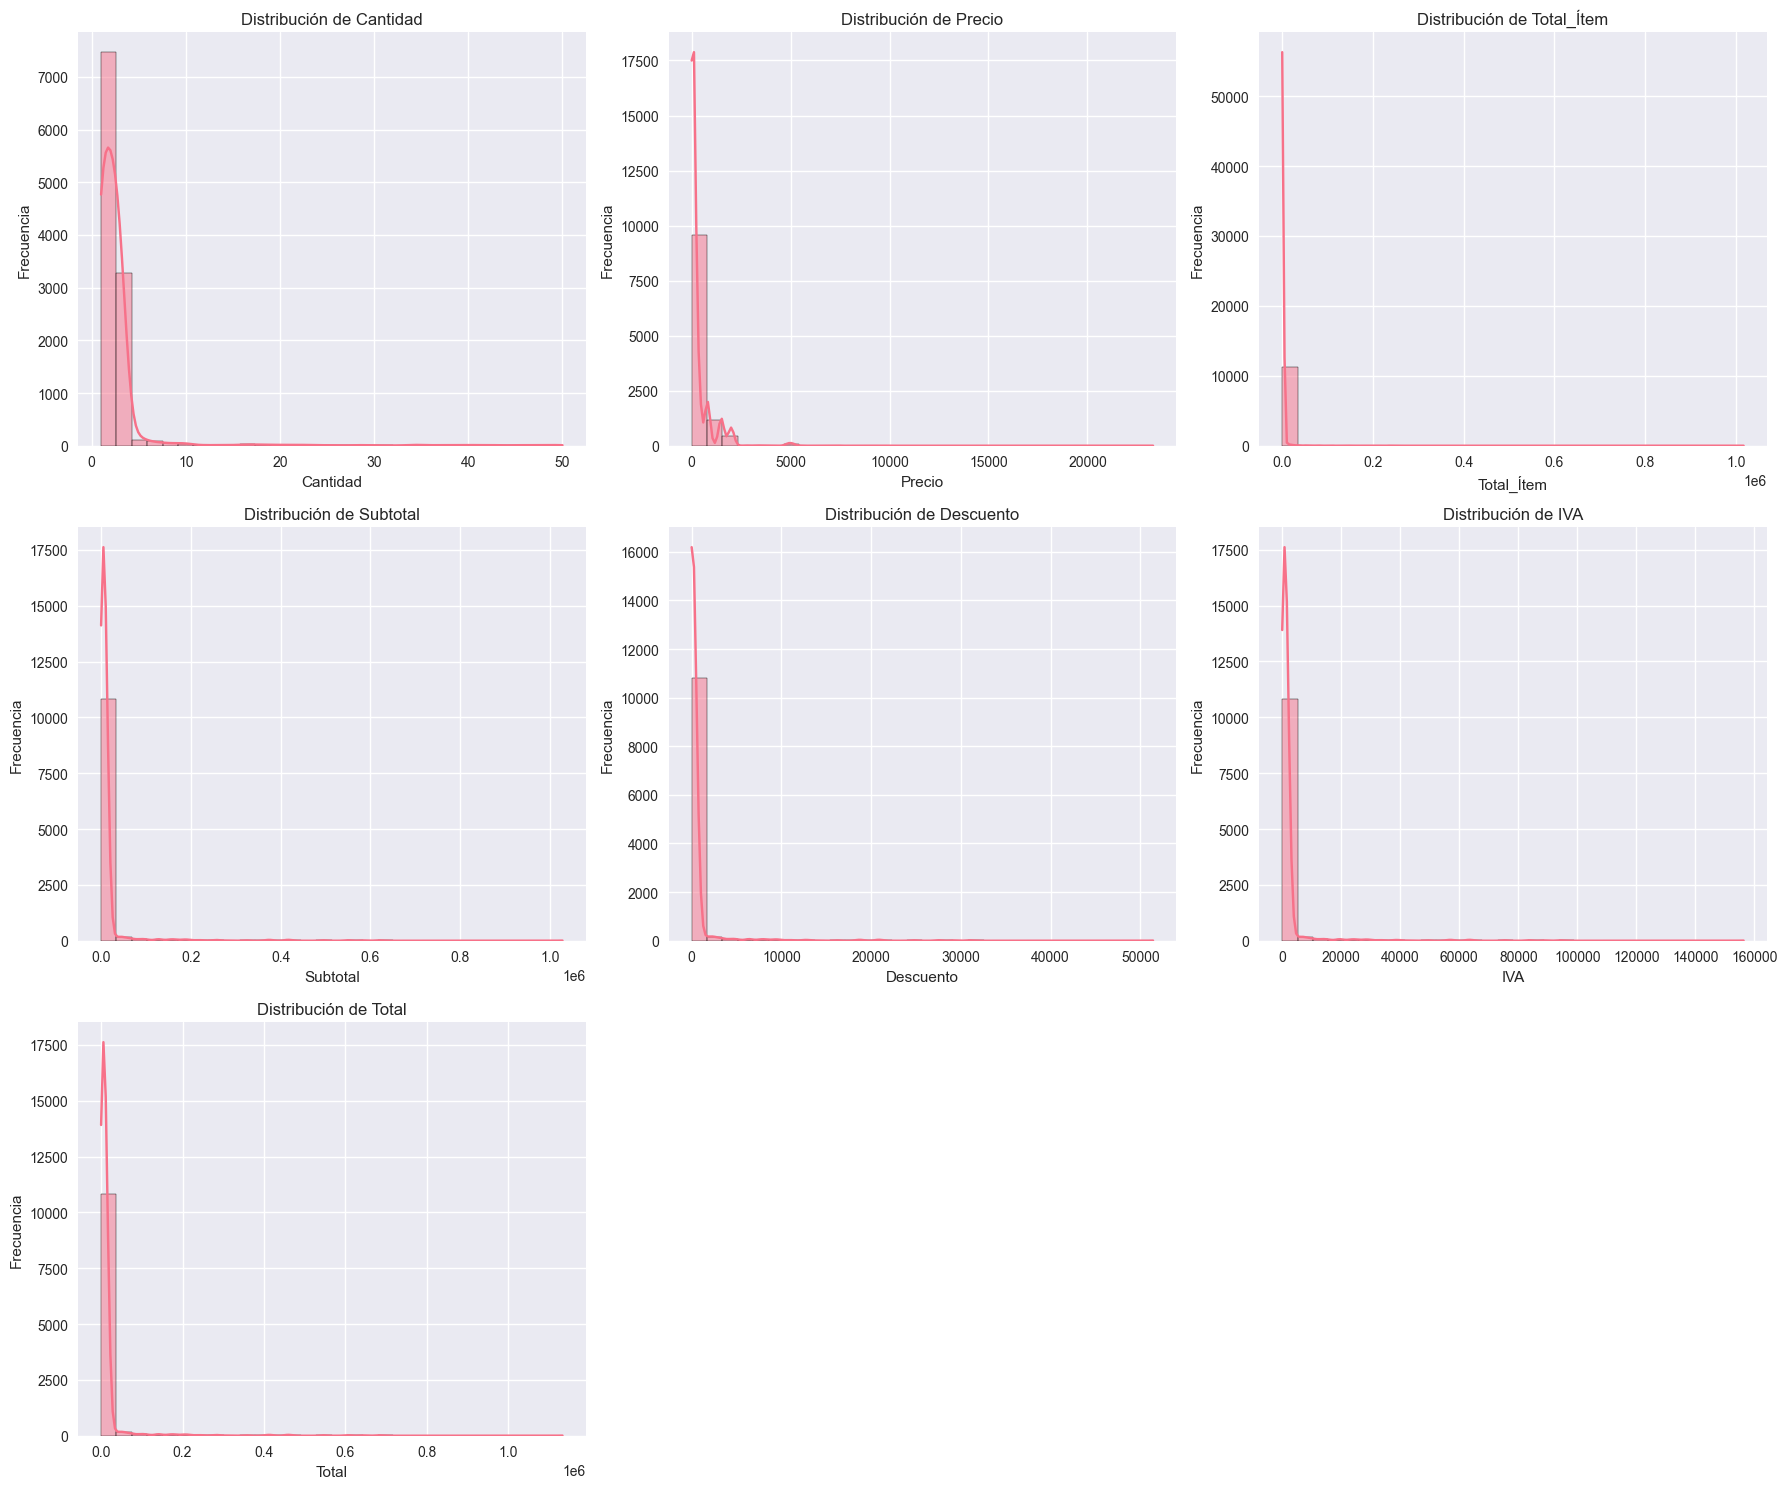

In [34]:
# Gráficos de distribución
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numeric_vars):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Eliminar subplots vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

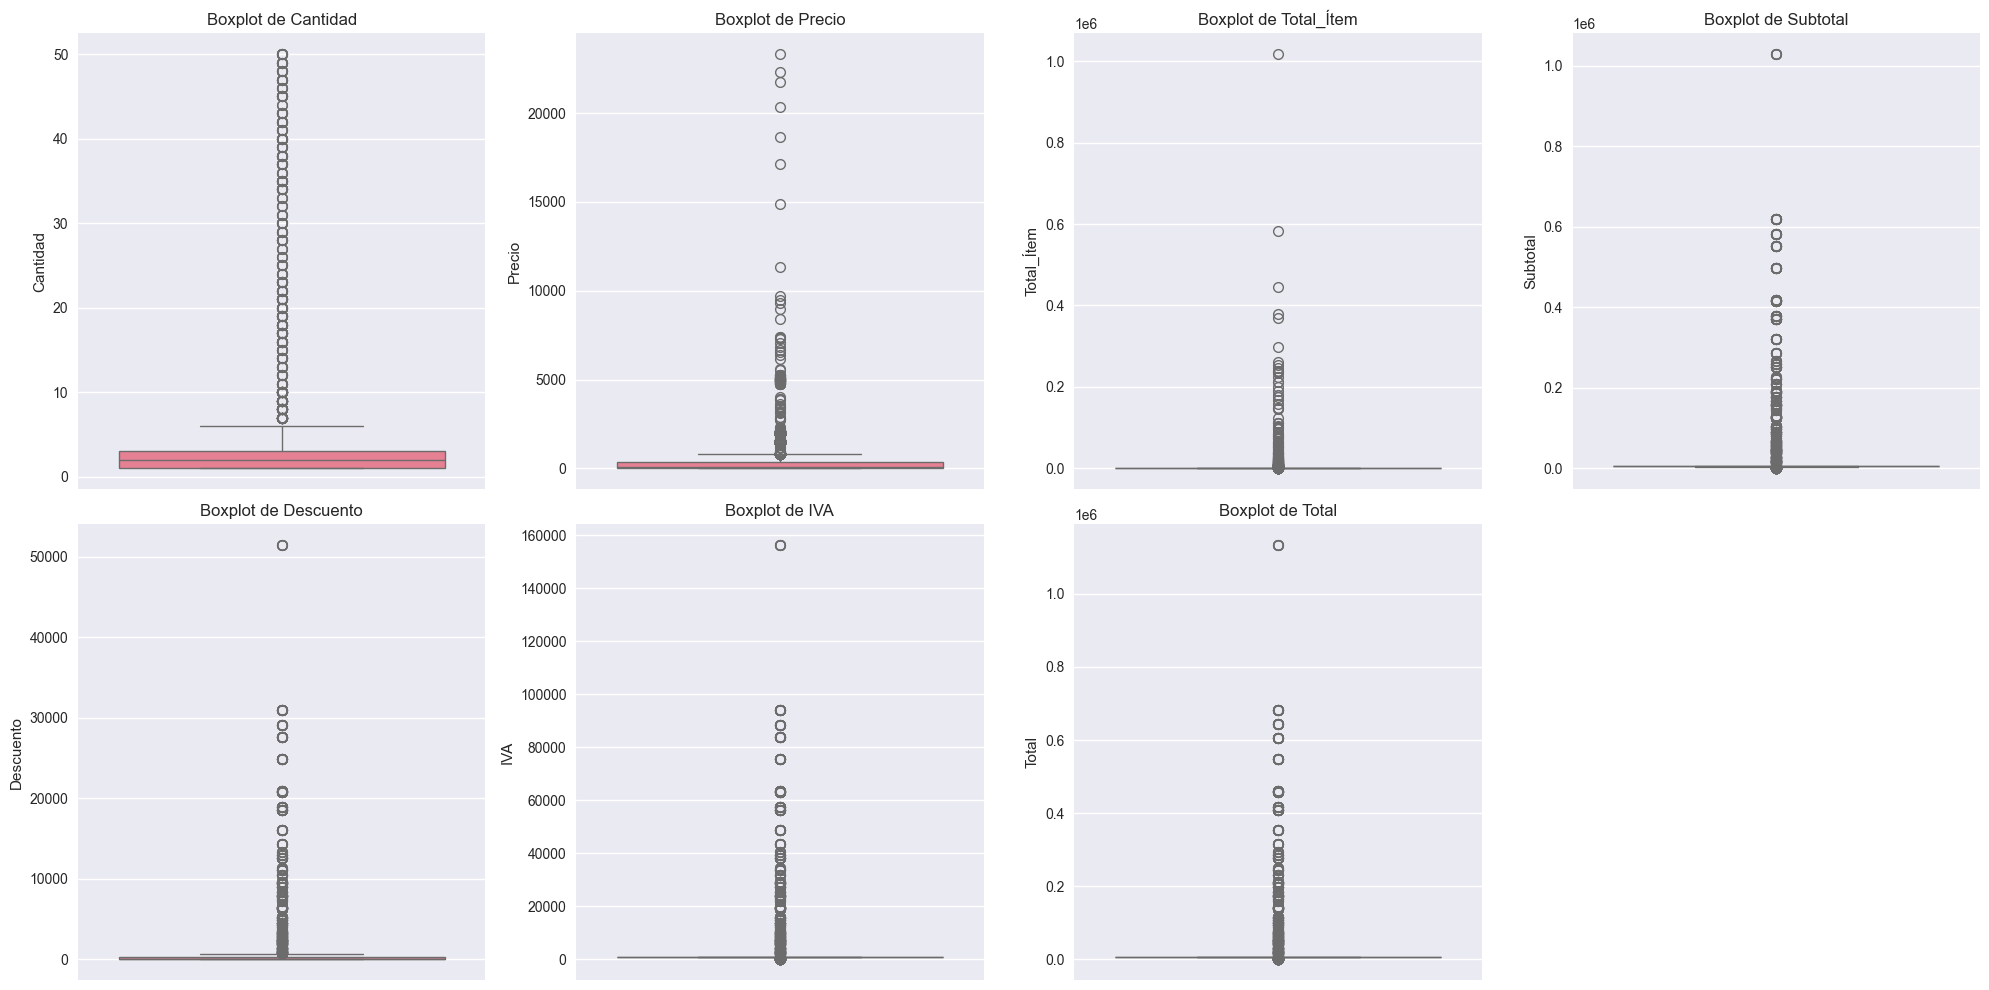

In [35]:
# Gráfico de caja (Boxplot) para identificar outliers visuales
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_vars):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* Alta variabilidad en los datos (desviación estándar significativa)
* Valores extremos:
 * Precio máximo: $23,314.88
 * Total máximo: $1,133,294
* Cantidad máxima: 50 items
* Presencia de tickets con montos muy altos que podrían considerarse outliers

Generando visualización de outliers originales...


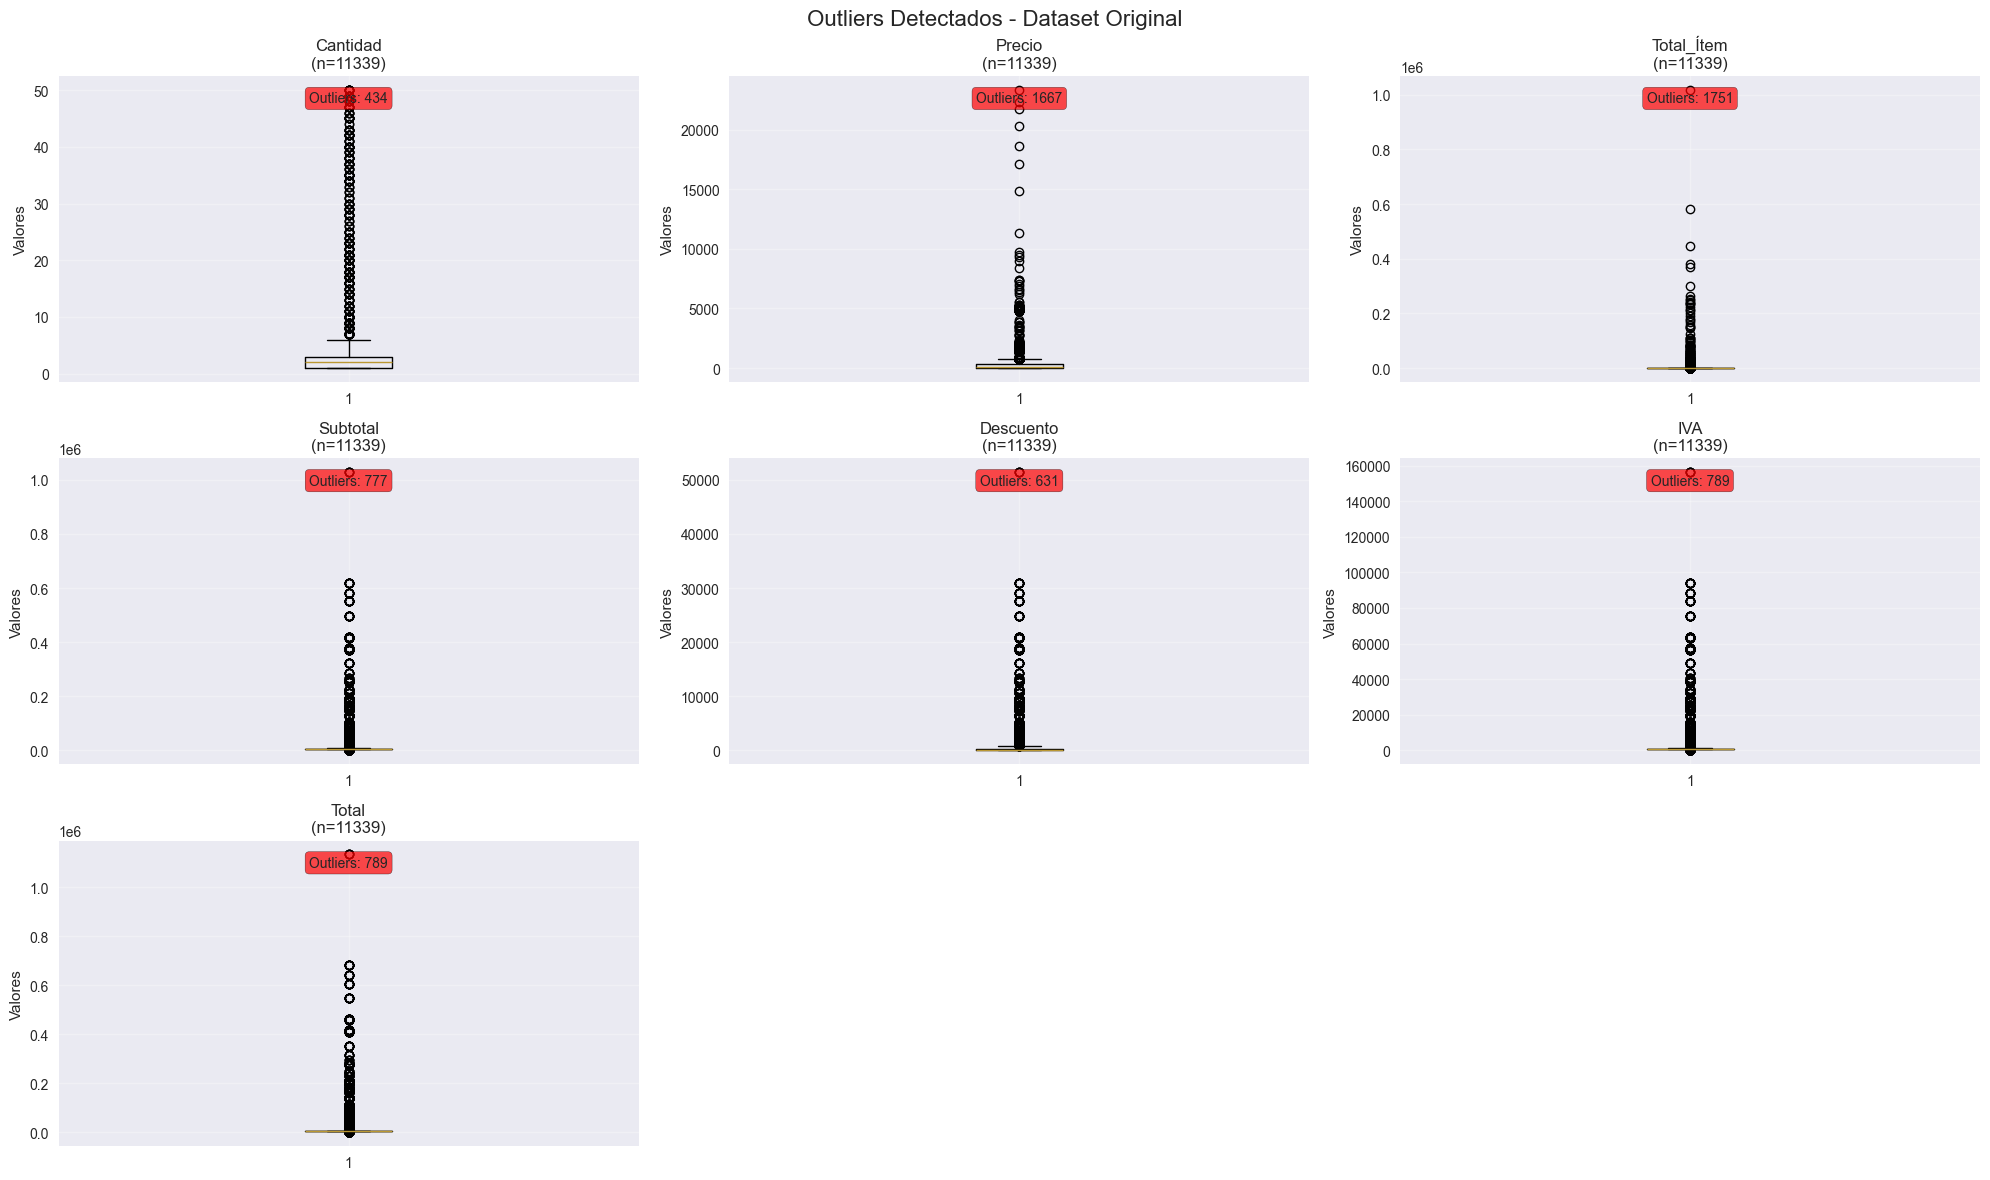

Q1: 1.00
Q3: 3.00
IQR: 2.00
Límite inferior: -2.00
Límite superior: 6.00
Outliers detectados: 434 (3.83%)
Rango de valores: [1.00, 50.00]

Q1: 34.59
Q3: 335.51
IQR: 300.91
Límite inferior: -416.78
Límite superior: 786.88
Outliers detectados: 1667 (14.70%)
Rango de valores: [1.04, 23314.88]

Q1: 74.73
Q3: 582.93
IQR: 508.20
Límite inferior: -687.56
Límite superior: 1345.23
Outliers detectados: 1751 (15.44%)
Rango de valores: [6.26, 1016999.28]

Q1: 5084.30
Q3: 6155.60
IQR: 1071.30
Límite inferior: 3477.35
Límite superior: 7762.55
Outliers detectados: 777 (6.85%)
Rango de valores: [0.00, 1028397.71]

Q1: 0.00
Q3: 307.78
IQR: 307.78
Límite inferior: -461.67
Límite superior: 769.45
Outliers detectados: 631 (5.56%)
Rango de valores: [0.00, 51419.89]

Q1: 813.49
Q3: 946.25
IQR: 132.76
Límite inferior: 614.35
Límite superior: 1145.39
Outliers detectados: 789 (6.96%)
Rango de valores: [0.00, 156316.45]

Q1: 5884.39
Q3: 6862.21
IQR: 977.82
Límite inferior: 4417.66
Límite superior: 8328.94
Outli

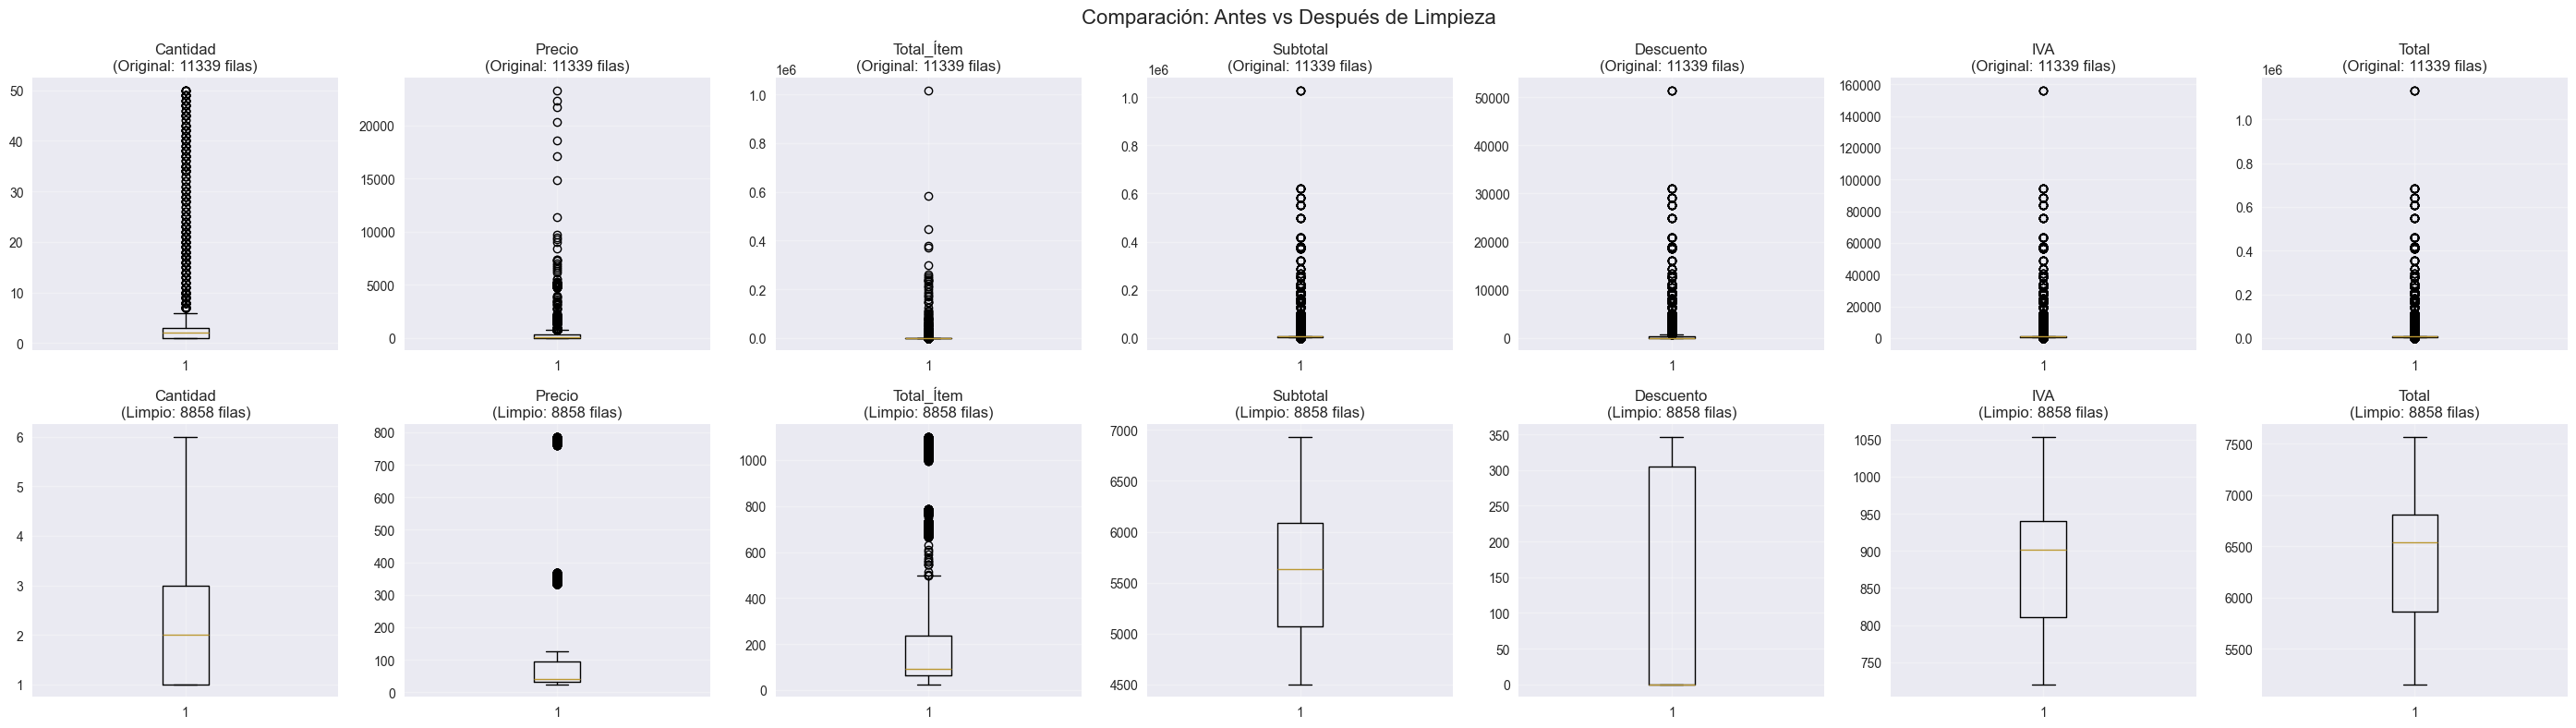


--- Cantidad ---
ORIGINAL:
  Media: 2.78
  Mediana: 2.00
  Desv. Estándar: 4.85
  Mín: 1.00
  Máx: 50.00
LIMPIO:
  Media: 1.99
  Mediana: 2.00
  Desv. Estándar: 0.87
  Mín: 1.00
  Máx: 6.00
  Reducción en Desv. Estándar: 82.0%

--- Precio ---
ORIGINAL:
  Media: 343.58
  Mediana: 81.55
  Desv. Estándar: 853.28
  Mín: 1.04
  Máx: 23314.88
LIMPIO:
  Media: 98.67
  Mediana: 41.59
  Desv. Estándar: 120.89
  Mín: 23.75
  Máx: 786.75
  Reducción en Desv. Estándar: 85.8%

--- Total_Ítem ---
ORIGINAL:
  Media: 1583.74
  Mediana: 124.68
  Desv. Estándar: 16326.79
  Mín: 6.26
  Máx: 1016999.28
LIMPIO:
  Media: 187.06
  Mediana: 93.38
  Desv. Estándar: 224.29
  Mín: 23.75
  Máx: 1102.25
  Reducción en Desv. Estándar: 98.6%

--- Subtotal ---
ORIGINAL:
  Media: 14223.62
  Mediana: 5682.63
  Desv. Estándar: 53529.10
  Mín: 0.00
  Máx: 1028397.71
LIMPIO:
  Media: 5572.02
  Mediana: 5634.39
  Desv. Estándar: 577.56
  Mín: 4500.22
  Máx: 6934.47
  Reducción en Desv. Estándar: 98.9%

--- Descuento ---
O

In [36]:
def limpiar_outliers_iqr_corregido(df, columnas, factor=1.5):
    df_limpio = df.copy()
    reporte = {}
    
    # Crear una máscara acumulativa para identificar todas las filas con outliers
    mask_outliers_total = pd.Series([False] * len(df), index=df.index)
    
    for columna in columnas:        
        # Calcular cuartiles
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calcular límites
        limite_inferior = Q1 - factor * IQR
        limite_superior = Q3 + factor * IQR
        
        # Identificar outliers en esta columna
        outliers_mask = (df[columna] < limite_inferior) | (df[columna] > limite_superior)
        num_outliers = outliers_mask.sum()
        porcentaje = (num_outliers / len(df)) * 100
        
        print(f"Q1: {Q1:.2f}")
        print(f"Q3: {Q3:.2f}")
        print(f"IQR: {IQR:.2f}")
        print(f"Límite inferior: {limite_inferior:.2f}")
        print(f"Límite superior: {limite_superior:.2f}")
        print(f"Outliers detectados: {num_outliers} ({porcentaje:.2f}%)")
        print(f"Rango de valores: [{df[columna].min():.2f}, {df[columna].max():.2f}]")
        
        # Acumular outliers (OR lógico)
        mask_outliers_total = mask_outliers_total | outliers_mask
        
        # Guardar información
        reporte[columna] = {
            'outliers_detectados': num_outliers,
            'porcentaje': porcentaje,
            'limite_inferior': limite_inferior,
            'limite_superior': limite_superior,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'min_original': df[columna].min(),
            'max_original': df[columna].max()
        }
        print()
    
    # Aplicar la máscara UNA SOLA VEZ al final
    filas_a_eliminar = mask_outliers_total.sum()
    df_limpio = df[~mask_outliers_total].copy()
    
    print(f"RESUMEN FINAL")
    print(f"Filas originales: {len(df)}")
    print(f"Filas con outliers: {filas_a_eliminar}")
    print(f"Filas conservadas: {len(df_limpio)}")
    print(f"Porcentaje conservado: {(len(df_limpio)/len(df))*100:.2f}%")
    
    return df_limpio, reporte

def visualizar_comparacion_outliers(df_original, df_limpio, columnas):
    n_cols = len(columnas)
    fig, axes = plt.subplots(2, n_cols, figsize=(4*n_cols, 8))
    
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, col in enumerate(columnas):
        # Boxplot original
        axes[0, i].boxplot(df_original[col])
        axes[0, i].set_title(f'{col}\n(Original: {len(df_original)} filas)')
        axes[0, i].grid(True, alpha=0.3)
        
        # Boxplot limpio
        axes[1, i].boxplot(df_limpio[col])
        axes[1, i].set_title(f'{col}\n(Limpio: {len(df_limpio)} filas)')
        axes[1, i].grid(True, alpha=0.3)
    
    plt.suptitle('Comparación: Antes vs Después de Limpieza', fontsize=16)
    plt.tight_layout()
    plt.show()

def estadisticas_comparativas(df_original, df_limpio, columnas):
    for col in columnas:
        print(f"\n--- {col} ---")
        print(f"ORIGINAL:")
        print(f"  Media: {df_original[col].mean():.2f}")
        print(f"  Mediana: {df_original[col].median():.2f}")
        print(f"  Desv. Estándar: {df_original[col].std():.2f}")
        print(f"  Mín: {df_original[col].min():.2f}")
        print(f"  Máx: {df_original[col].max():.2f}")
        
        print(f"LIMPIO:")
        print(f"  Media: {df_limpio[col].mean():.2f}")
        print(f"  Mediana: {df_limpio[col].median():.2f}")
        print(f"  Desv. Estándar: {df_limpio[col].std():.2f}")
        print(f"  Mín: {df_limpio[col].min():.2f}")
        print(f"  Máx: {df_limpio[col].max():.2f}")
        
        # Calcular reducciones
        reduccion_std = ((df_original[col].std() - df_limpio[col].std()) / df_original[col].std()) * 100
        print(f"  Reducción en Desv. Estándar: {reduccion_std:.1f}%")

def ejecutar_limpieza_completa(df):
    # 1. Cargar datos
    df['Fecha'] = pd.to_datetime(df['Fecha'])
        
    # 2. Definir columnas a limpiar
    columnas_numericas = ['Cantidad', 'Precio', 'Total_Ítem', 'Subtotal', 'Descuento', 'IVA', 'Total']
    
    # 3. Mostrar boxplots originales
    print("Generando visualización de outliers originales...")
    plt.figure(figsize=(20, 12))
    for i, col in enumerate(columnas_numericas, 1):
        plt.subplot(3, 3, i)
        plt.boxplot(df[col])
        plt.title(f'{col}\n(n={len(df)})')
        plt.ylabel('Valores')
        plt.grid(True, alpha=0.3)
        
        # Mostrar cantidad de outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)).sum()
        plt.text(0.5, 0.95, f'Outliers: {outliers}', transform=plt.gca().transAxes, 
                ha='center', va='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.7))
    
    plt.suptitle('Outliers Detectados - Dataset Original', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # 4. Limpiar outliers
    df_limpio, reporte = limpiar_outliers_iqr_corregido(df, columnas_numericas, factor=1.5)
    
    # 5. Visualizar comparación
    visualizar_comparacion_outliers(df, df_limpio, columnas_numericas)
    
    # 6. Mostrar estadísticas
    estadisticas_comparativas(df, df_limpio, columnas_numericas)
    
    return df_limpio, reporte

# Para ejecutar en tu notebook:
df1, reporte = ejecutar_limpieza_completa(df1)

Dataset cargado: 11339 filas, 30 columnas
Variables numéricas analizadas: 7

 MATRIZ DE CORRELACIÓN 
            Cantidad  Precio  Total_Ítem  Subtotal  Descuento    IVA  Total
Cantidad       1.000   0.151       0.403     0.448      0.452  0.448  0.448
Precio         0.151   1.000       0.588     0.267      0.269  0.266  0.266
Total_Ítem     0.403   0.588       1.000     0.394      0.393  0.394  0.394
Subtotal       0.448   0.267       0.394     1.000      0.999  1.000  1.000
Descuento      0.452   0.269       0.393     0.999      1.000  0.999  0.999
IVA            0.448   0.266       0.394     1.000      0.999  1.000  1.000
Total          0.448   0.266       0.394     1.000      0.999  1.000  1.000


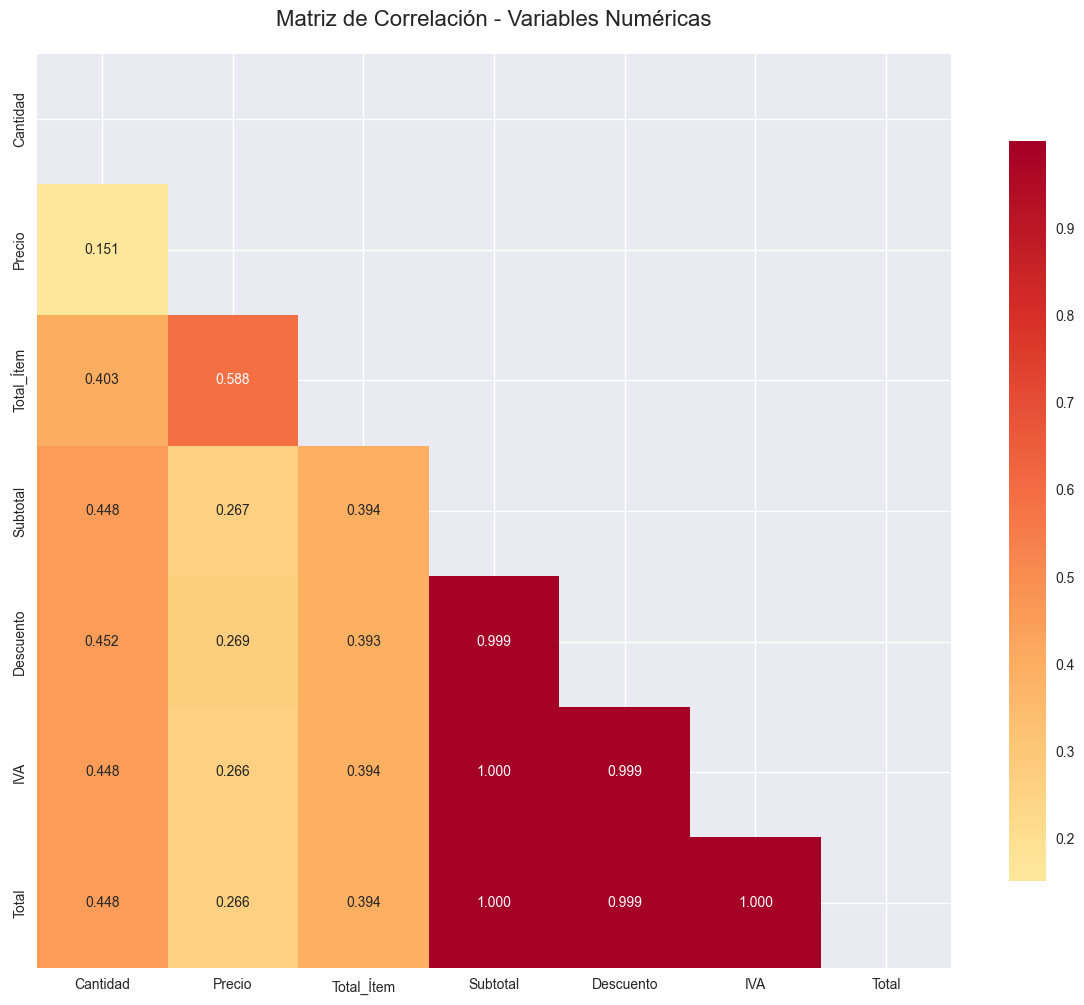


CORRELACIONES ALTAS (|r| > 0.8) 
Subtotal <-> Descuento: 0.999
Subtotal <-> IVA: 1.000
Subtotal <-> Total: 1.000
Descuento <-> IVA: 0.999
Descuento <-> Total: 0.999
IVA <-> Total: 1.000

ANÁLISIS VIF (Factor de Inflación de Varianza)
VIF > 10: Multicolinealidad severa
VIF > 5: Multicolinealidad moderada
VIF < 5: Aceptable

     Variable           VIF
3    Subtotal  8.874088e+12
5         IVA  8.013522e+12
4   Descuento  2.206122e+10
6       Total  1.360084e+06
2  Total_Ítem  1.759007e+00
1      Precio  1.650587e+00
0    Cantidad  1.570860e+00


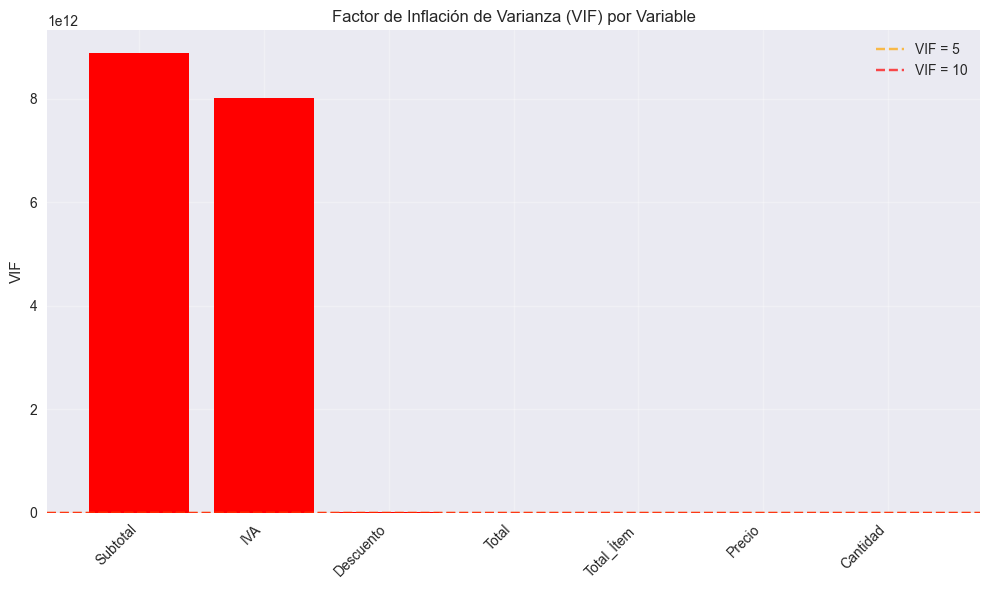


 RECOMENDACIONES
ELIMINAR (VIF > 10): ['Subtotal', 'IVA', 'Descuento', 'Total']
MANTENER (VIF <= 5): ['Total_Ítem', 'Precio', 'Cantidad']

RELACIÓN CON VARIABLE OBJETIVO (Total)
     Variable  Correlación_con_Total   P_value Significativa
5         IVA               0.996173  0.000000            Sí
3    Subtotal               0.976670  0.000000            Sí
4   Descuento               0.617915  0.000000            Sí
1      Precio               0.017225  0.105015            No
2  Total_Ítem               0.011026  0.299451            No
0    Cantidad               0.010309  0.331954            No


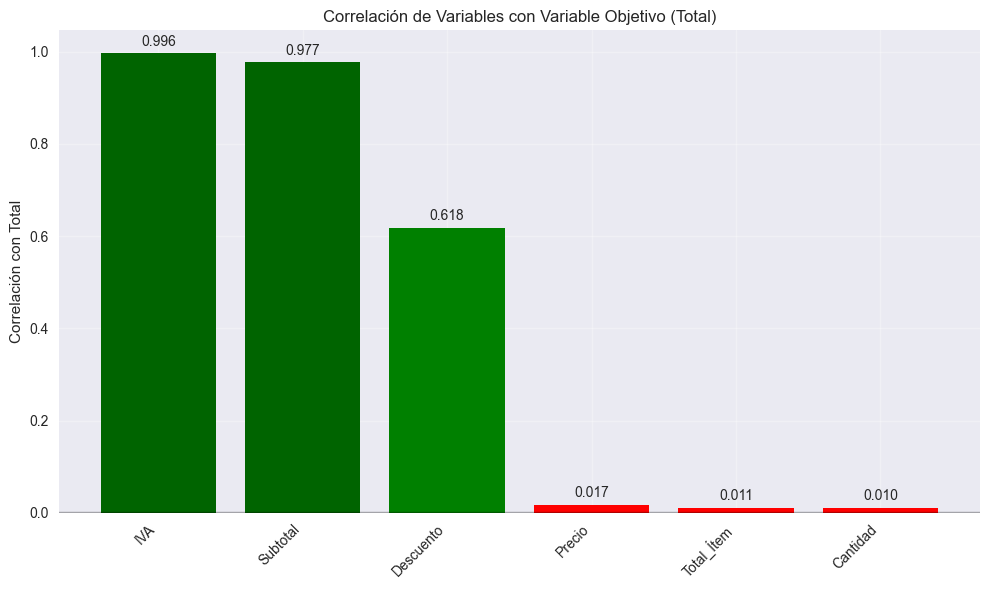


CREANDO DATASET SIN MULTICOLINEALIDAD (VIF < 5)
Variables originales: 7
Variables después de filtro VIF: 4
Variables mantenidas: ['Total_Ítem', 'Precio', 'Cantidad', 'Total']

VIF después del filtrado:
     Variable       VIF
0  Total_Ítem  1.632888
1      Precio  1.520587
2    Cantidad  1.199289
Dimensiones finales: (8858, 8)


In [39]:
def analisis_correlacion_completo(df1):
    # 1. Cargar dataset limpio
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    
    print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    
    # 2. Preparar variables numéricas
    variables_numericas = ['Cantidad', 'Precio', 'Total_Ítem', 'Subtotal', 'Descuento', 'IVA', 'Total']
    df_num = df[variables_numericas].copy()
    
    print(f"Variables numéricas analizadas: {len(variables_numericas)}")
    
    # 3. Matriz de correlación
    print("\n MATRIZ DE CORRELACIÓN ")
    corr_matrix = df_num.corr()
    print(corr_matrix.round(3))
    
    # 4. Visualizar matriz de correlación
    plt.figure(figsize=(12, 10))
    
    # Crear máscara para la matriz triangular superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Heatmap
    sns.heatmap(corr_matrix, mask=mask,annot=True, cmap='RdYlBu_r', center=0,square=True,fmt='.3f',cbar_kws={"shrink": .8})
    
    plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # 5. Identificar correlaciones altas
    print("\nCORRELACIONES ALTAS (|r| > 0.8) ")
    correlaciones_altas = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.8:
                var1 = corr_matrix.columns[i]
                var2 = corr_matrix.columns[j]
                correlaciones_altas.append({
                    'Variable_1': var1,
                    'Variable_2': var2,
                    'Correlación': corr_val
                })
                print(f"{var1} <-> {var2}: {corr_val:.3f}")
    
    if not correlaciones_altas:
        print("No se encontraron correlaciones > 0.8")
    
    # 6. Análisis VIF (Variance Inflation Factor)
    print("\nANÁLISIS VIF (Factor de Inflación de Varianza)")
    print("VIF > 10: Multicolinealidad severa")
    print("VIF > 5: Multicolinealidad moderada")
    print("VIF < 5: Aceptable\n")
    
    # Calcular VIF para cada variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df_num.columns
    vif_data["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]
    vif_data = vif_data.sort_values('VIF', ascending=False)
    
    print(vif_data)
    
    # 7. Visualizar VIF
    plt.figure(figsize=(10, 6))
    colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in vif_data['VIF']]
    bars = plt.bar(range(len(vif_data)), vif_data['VIF'], color=colors)
    plt.xticks(range(len(vif_data)), vif_data['Variable'], rotation=45, ha='right')
    plt.ylabel('VIF')
    plt.title('Factor de Inflación de Varianza (VIF) por Variable')
    plt.axhline(y=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5')
    plt.axhline(y=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 8. Recomendaciones basadas en VIF
    print("\n RECOMENDACIONES")
    variables_problematicas = vif_data[vif_data['VIF'] > 10]['Variable'].tolist()
    variables_moderadas = vif_data[(vif_data['VIF'] > 5) & (vif_data['VIF'] <= 10)]['Variable'].tolist()
    
    if variables_problematicas:
        print(f"ELIMINAR (VIF > 10): {variables_problematicas}")
    if variables_moderadas:
        print(f"CONSIDERAR ELIMINAR (VIF > 5): {variables_moderadas}")
    
    variables_buenas = vif_data[vif_data['VIF'] <= 5]['Variable'].tolist()
    if variables_buenas:
        print(f"MANTENER (VIF <= 5): {variables_buenas}")
    
    return df_num, corr_matrix, vif_data, correlaciones_altas

def analizar_relacion_con_variable_objetivo(df):
    variables_numericas = ['Cantidad', 'Precio', 'Total_Ítem', 'Subtotal', 'Descuento', 'IVA']
    
    print("\nRELACIÓN CON VARIABLE OBJETIVO (Total)")
    
    # Correlaciones con la variable objetivo
    correlaciones_objetivo = []
    for var in variables_numericas:
        corr, p_value = pearsonr(df[var], df['Total'])
        correlaciones_objetivo.append({
            'Variable': var,
            'Correlación_con_Total': corr,
            'P_value': p_value,
            'Significativa': 'Sí' if p_value < 0.05 else 'No'
        })
    
    df_corr_obj = pd.DataFrame(correlaciones_objetivo).sort_values('Correlación_con_Total', key=abs, ascending=False)
    print(df_corr_obj)
    
    # Visualizar correlaciones con variable objetivo
    plt.figure(figsize=(10, 6))
    colors = ['darkgreen' if abs(x) > 0.7 else 'green' if abs(x) > 0.5 else 'orange' if abs(x) > 0.3 else 'red' for x in df_corr_obj['Correlación_con_Total']]
    
    bars = plt.bar(df_corr_obj['Variable'], df_corr_obj['Correlación_con_Total'], color=colors)
    plt.ylabel('Correlación con Total')
    plt.title('Correlación de Variables con Variable Objetivo (Total)')
    plt.xticks(rotation=45, ha='right')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    
    # Añadir valores en las barras
    for bar, valor in zip(bars, df_corr_obj['Correlación_con_Total']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{valor:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return df_corr_obj

def crear_dataset_sin_multicolinealidad(df_num, vif_data, umbral_vif=5):

    print(f"\nCREANDO DATASET SIN MULTICOLINEALIDAD (VIF < {umbral_vif})")
    
    # Variables a mantener
    variables_mantener = vif_data[vif_data['VIF'] < umbral_vif]['Variable'].tolist()
    
    # Si 'Total' está en las variables a eliminar, la mantenemos como objetivo
    if 'Total' not in variables_mantener:
        variables_mantener.append('Total')
    
    df_sin_multicol = df_num[variables_mantener].copy()
    
    print(f"Variables originales: {len(df_num.columns)}")
    print(f"Variables después de filtro VIF: {len(df_sin_multicol.columns)}")
    print(f"Variables mantenidas: {list(df_sin_multicol.columns)}")
    
    # Recalcular VIF para el dataset filtrado
    if len(df_sin_multicol.columns) > 1:
        variables_sin_total = [col for col in df_sin_multicol.columns if col != 'Total']
        if len(variables_sin_total) > 1:
            df_para_vif = df_sin_multicol[variables_sin_total]
            vif_nuevo = pd.DataFrame()
            vif_nuevo["Variable"] = df_para_vif.columns
            vif_nuevo["VIF"] = [variance_inflation_factor(df_para_vif.values, i) for i in range(len(df_para_vif.columns))]
            
            print(f"\nVIF después del filtrado:")
            print(vif_nuevo.sort_values('VIF', ascending=False))
    
    return df_sin_multicol

def ejecutar_analisis_completo(df):

    # 1. Análisis de correlación y VIF
    df_num, corr_matrix, vif_data, correlaciones_altas = analisis_correlacion_completo(df)
    
    # 2. Relación con variable objetivo
    df_corr_objetivo = analizar_relacion_con_variable_objetivo(df)
    
    # 3. Crear dataset sin multicolinealidad
    df_filtrado = crear_dataset_sin_multicolinealidad(df_num, vif_data, umbral_vif=5)
    
    # 4. Guardar dataset filtrado
    # Cargar dataset completo para mantener otras columnas
    df_completo = df
    
    # Mantener solo las variables numéricas filtradas + variables categóricas
    variables_categoricas = ['Ticket', 'Fecha', 'Producto', 'Método_Pago']
    columnas_finales = list(df_filtrado.columns) + variables_categoricas
    
    df_final = df_completo[columnas_finales].copy()
    
    print(f"Dimensiones finales: {df_final.shape}")
    
    return df_final, vif_data, df_corr_objetivo

# Para ejecutar todo el análisis:
df1, vif_data, correlaciones_objetivo = ejecutar_analisis_completo(df1)

In [43]:
def aplicar_pca_grupos_correlacionados(df):
    # 1. Cargar datos
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    
    print(f"Dataset original: {df.shape}")
    
    # 2. Definir grupos de variables correlacionadas
    grupo_financiero = ['Subtotal', 'IVA', 'Total']  # Altamente correlacionadas (0.98-0.99)
    grupo_producto = ['Precio', 'Total_Ítem']        # Correlacionadas (0.83)
    variables_independientes = ['Cantidad', 'Descuento']  # Menos correlacionadas
    
    print("Grupos identificados:")
    print(f"📊 Grupo Financiero: {grupo_financiero}")
    print(f"🛍️  Grupo Producto: {grupo_producto}")
    print(f"🔵 Variables Independientes: {variables_independientes}")
    
    # 3. Preparar datos para PCA
    scaler = StandardScaler()
    
    # Grupo Financiero - PCA
    print(f"\n--- PCA GRUPO FINANCIERO ---")
    X_financiero = df[grupo_financiero]
    X_financiero_scaled = scaler.fit_transform(X_financiero)
    
    pca_financiero = PCA()
    X_financiero_pca = pca_financiero.fit_transform(X_financiero_scaled)
    
    # Análisis de componentes
    print(f"Varianza explicada por componente: {pca_financiero.explained_variance_ratio_}")
    print(f"Varianza acumulada: {np.cumsum(pca_financiero.explained_variance_ratio_)}")
    
    # Decidir cuántos componentes mantener (>95% varianza)
    n_components_fin = np.argmax(np.cumsum(pca_financiero.explained_variance_ratio_) >= 0.95) + 1
    print(f"Componentes necesarios para 95% varianza: {n_components_fin}")
    
    # Grupo Producto - PCA
    print(f"\n--- PCA GRUPO PRODUCTO ---")
    X_producto = df[grupo_producto]
    X_producto_scaled = scaler.fit_transform(X_producto)
    
    pca_producto = PCA()
    X_producto_pca = pca_producto.fit_transform(X_producto_scaled)
    
    print(f"Varianza explicada por componente: {pca_producto.explained_variance_ratio_}")
    print(f"Varianza acumulada: {np.cumsum(pca_producto.explained_variance_ratio_)}")
    
    n_components_prod = np.argmax(np.cumsum(pca_producto.explained_variance_ratio_) >= 0.95) + 1
    print(f"Componentes necesarios para 95% varianza: {n_components_prod}")
    
    # 4. Crear dataset con componentes PCA
    # Tomar solo los componentes necesarios
    df_pca = pd.DataFrame()
    
    # Componentes del grupo financiero
    for i in range(n_components_fin):
        df_pca[f'PC_Financiero_{i+1}'] = X_financiero_pca[:, i]
    
    # Componentes del grupo producto
    for i in range(n_components_prod):
        df_pca[f'PC_Producto_{i+1}'] = X_producto_pca[:, i]
    
    # Variables independientes (normalizadas)
    scaler_indep = StandardScaler()
    X_independientes = scaler_indep.fit_transform(df[variables_independientes])
    for i, var in enumerate(variables_independientes):
        df_pca[f'{var}_scaled'] = X_independientes[:, i]
    
    # Variable objetivo (sin escalar para interpretación)
    df_pca['Total'] = df['Total'].values
    
    print(f"\n--- DATASET CON PCA ---")
    print(f"Dimensiones finales: {df_pca.shape}")
    print(f"Columnas: {list(df_pca.columns)}")
    
    return df_pca, pca_financiero, pca_producto, scaler, scaler_indep

def visualizar_pca_resultados(df_pca, pca_financiero, pca_producto):
    """
    Visualiza los resultados del PCA
    """
    print("\n=== VISUALIZACIÓN DE RESULTADOS PCA ===")
    
    # 1. Varianza explicada
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Grupo Financiero
    axes[0].bar(range(1, len(pca_financiero.explained_variance_ratio_) + 1), pca_financiero.explained_variance_ratio_)
    axes[0].plot(range(1, len(pca_financiero.explained_variance_ratio_) + 1), np.cumsum(pca_financiero.explained_variance_ratio_), 'ro-')
    axes[0].set_xlabel('Componente Principal')
    axes[0].set_ylabel('Varianza Explicada')
    axes[0].set_title('PCA - Grupo Financiero\n(Subtotal, IVA, Total)')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend(['Varianza Acumulada', 'Varianza Individual'])
    
    # Grupo Producto
    axes[1].bar(range(1, len(pca_producto.explained_variance_ratio_) + 1), pca_producto.explained_variance_ratio_)
    axes[1].plot(range(1, len(pca_producto.explained_variance_ratio_) + 1), np.cumsum(pca_producto.explained_variance_ratio_), 'ro-')
    axes[1].set_xlabel('Componente Principal')
    axes[1].set_ylabel('Varianza Explicada')
    axes[1].set_title('PCA - Grupo Producto\n(Precio, Total_Ítem)')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend(['Varianza Acumulada', 'Varianza Individual'])
    
    plt.tight_layout()
    plt.show()
    
    # 2. Matriz de correlación del dataset PCA
    variables_pca = [col for col in df_pca.columns if col != 'Total']
    corr_matrix_pca = df_pca[variables_pca + ['Total']].corr()
    
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix_pca, dtype=bool))
    sns.heatmap(corr_matrix_pca, mask=mask, annot=True, cmap='RdYlBu_r', center=0, square=True, fmt='.3f')
    plt.title('Matriz de Correlación - Dataset con PCA', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # 3. Verificar multicolinealidad residual
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    print("\n--- VIF DESPUÉS DE PCA ---")
    vif_data = pd.DataFrame()
    X_vif = df_pca[variables_pca]
    vif_data["Variable"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
    vif_data = vif_data.sort_values('VIF', ascending=False)
    print(vif_data)
    
    return corr_matrix_pca, vif_data

def evaluar_modelo_pca(df_pca):
    """
    Evalúa el modelo de regresión con componentes PCA
    """
    print("\n=== EVALUACIÓN DEL MODELO CON PCA ===")
    
    # Preparar datos
    X = df_pca.drop('Total', axis=1)
    y = df_pca['Total']
    
    # División train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    # Predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    
    # Métricas
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    print(f"R² Entrenamiento: {r2_train:.4f}")
    print(f"R² Prueba: {r2_test:.4f}")
    print(f"RMSE Prueba: {rmse_test:.2f}")
    
    # Importancia de componentes
    importancias = pd.DataFrame({
        'Componente': X.columns,
        'Coeficiente': modelo.coef_,
        'Importancia_Abs': np.abs(modelo.coef_)
    }).sort_values('Importancia_Abs', ascending=False)
    
    print(f"\nImportancia de Componentes:")
    print(importancias)
    
    # Visualización
    plt.figure(figsize=(12, 5))
    
    # Predicciones vs Reales
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred_test, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Predicciones vs Reales\nR² = {r2_test:.4f}')
    plt.grid(True, alpha=0.3)
    
    # Importancia de componentes
    plt.subplot(1, 2, 2)
    plt.barh(range(len(importancias)), importancias['Coeficiente'])
    plt.yticks(range(len(importancias)), importancias['Componente'])
    plt.xlabel('Coeficiente')
    plt.title('Importancia de Componentes PCA')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return modelo, importancias, r2_test

def comparar_con_modelo_original():
    """
    Compara el modelo PCA con el modelo usando variables originales
    """
    print("\n=== COMPARACIÓN CON MODELO ORIGINAL ===")
    
    # Cargar datos originales
    df_original = pd.read_csv('tickets_dataset_sin_outliers.csv')
    
    # Modelo con variables originales (sin multicolinealidad extrema)
    variables_originales = ['Cantidad', 'Precio', 'Descuento']  # Variables con VIF < 10
    X_orig = df_original[variables_originales]
    y_orig = df_original['Total']
    
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
        X_orig, y_orig, test_size=0.2, random_state=42)
    
    modelo_orig = LinearRegression()
    modelo_orig.fit(X_train_orig, y_train_orig)
    
    y_pred_orig = modelo_orig.predict(X_test_orig)
    r2_orig = r2_score(y_test_orig, y_pred_orig)
    
    print(f"Modelo Original (sin PCA): R² = {r2_orig:.4f}")
    
    return r2_orig

def ejecutar_analisis_pca_completo(df):
    # 1. Aplicar PCA
    df_pca, pca_fin, pca_prod, scaler, scaler_indep = aplicar_pca_grupos_correlacionados(df)
    
    # 2. Visualizar resultados
    corr_matrix, vif_data = visualizar_pca_resultados(df_pca, pca_fin, pca_prod)
    
    # 3. Evaluar modelo
    modelo, importancias, r2_pca = evaluar_modelo_pca(df_pca)
    
    # 4. Comparar con modelo original
    r2_original = comparar_con_modelo_original()
    
    # 5. Resumen final
    print(f"\n=== RESUMEN FINAL ===")
    print(f"R² Modelo PCA: {r2_pca:.4f}")
    print(f"R² Modelo Original: {r2_original:.4f}")
    print(f"Mejora con PCA: {((r2_pca - r2_original) / r2_original * 100):+.1f}%")
    
    return df_pca, modelo, importancias

# Para ejecutar todo:
df_pca, modelo, importancias = ejecutar_analisis_pca_completo(df1)

Dataset original: (8858, 8)
Grupos identificados:
📊 Grupo Financiero: ['Subtotal', 'IVA', 'Total']
🛍️  Grupo Producto: ['Precio', 'Total_Ítem']
🔵 Variables Independientes: ['Cantidad', 'Descuento']

--- PCA GRUPO FINANCIERO ---


KeyError: "['Subtotal', 'IVA'] not in index"

### 4. Modelado (Modeling)

Esta fase se centró en construir y entrenar modelos de regresión lineal para predecir el valor total de las ventas. El proceso fue iterativo, comenzando con un modelo de línea de base y luego aplicando técnicas avanzadas para mejorar su rendimiento y robustez.



1. Modelo OLS (Ordinary Least Squares)


2. Modelo de Regresión Lasso (L1 Regularización)


3. Modelo de regresion Robusto


4. Modelo de Regresión RANSAC (RANdom SAmple Consensus)

### 5. Evaluación (Evaluation)

Objetivo: Evaluar el desempeño de los modelos y validar el dataset preparado.
Actividades Realizadas:

Métricas: Calcular R², MSE, RMSE con sklearn.metrics.
Validación Cruzada: cross_val_score() para robustez.
Comparación: Evaluar OLS vs. regresiones robustas (Ridge, Lasso, RANSAC) en presencia de outliers o multicolinealidad.
Iteración: Si el desempeño es bajo, regresar a fases previas (e.g., mejorar extracción regex).


Herramientas: sklearn.metrics, visualizaciones con matplotlib y seaborn.

### 6. Despliegue (Deployment)

Objetivo: Preparar para implementación futura, aunque en esta práctica académica sea conceptual.
Actividades Realizadas: Exportar dataset y modelos (e.g., joblib.dump(model, 'modelo.pkl')), documentar pipeline en un script reproducible.
Consideraciones: Posible integración en una app web para predicciones en tiempo real, pero limitada a la práctica.

Esta metodología CRISP-DM asegura un enfoque científico, iterativo y data-driven, adaptado a la extracción de datos de PDFs. Se documenta con código en Jupyter Notebooks para trazabilidad. En total, se procesaron [especifica, e.g., 50 PDFs], generando un dataset de [e.g., 200 filas]. Si necesitas código específico para alguna fase o ajustar a otro marco (e.g., SEMMA), avísame para refinarlo paso a paso antes de avanzar al siguiente apartado del reporte.